In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# !pip install git+https://github.com/qubvel/segmentation_models

In [3]:
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow
import keras
from keras import Sequential, Model
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, UpSampling2D, Dropout, Input, Concatenate
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 
import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.models import Model,load_model
import keras
from keras.layers import Input, Conv2D, Conv2DTranspose,AveragePooling2D, MaxPooling2D,UpSampling2D,LeakyReLU, concatenate, Dropout,BatchNormalization,Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pandas as pd
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from numpy.random import seed
seed(123)
import tensorflow as tf
# tf.set_random_seed(123)
from keras import backend as K
# keras.utils.get_custom_objects().update(custom_objects)

# from segmentation_models import Unet
# from segmentation_models.backbones import get_preprocessing
# from segmentation_models.losses import bce_jaccard_loss
# from segmentation_models.metrics import iou_score
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from keras.optimizers import Adam
# from tensorflow.keras.losses import binary_crossentropy
# from keras.models import model_from_json

# from keras.layers import Input, Conv2D, Reshape
# from keras.models import Model

In [4]:
images_folder1 = '../input/spartificial-crop-land-segmentation/images/images'
images_folder2 = '../input/spartificial-crop-land-segmentation/Shivam-20210702T050309Z-001/Shivam/Data/Data'
images_folder3 = '../input/spartificial-crop-land-segmentation/SamyakJain-20210702T045125Z-001/SamyakJain/Images/Images'
images_folder4 = '../input/spartificial-crop-land-segmentation/Nitin Grover-20210703T052540Z-001/Nitin Grover/IMAGES/images'
masks_folder1 = '../input/spartificial-crop-land-segmentation/masks'
masks_folder2 = '../input/spartificial-crop-land-segmentation/Shivam-20210702T050309Z-001/Shivam/Mask/Mask'
masks_folder3 = '../input/spartificial-crop-land-segmentation/SamyakJain-20210702T045125Z-001/SamyakJain/Masks/Masks'
masks_folder4 = '../input/spartificial-crop-land-segmentation/Nitin Grover-20210703T052540Z-001/Nitin Grover/MASKS/masks'

label_color = {
        'cultivated':(0,0 ,255), #red
        'non-cultivated':(0,255, 0), #green
        'building':(0, 255, 255), #yellow
        'water-body':(255,0,0) #blue
    }

In [5]:
image_name_list1 = sorted(os.listdir(images_folder1))
image_name_list2 = sorted(os.listdir(images_folder2))
image_name_list3 = sorted(os.listdir(images_folder3))
image_name_list4 = sorted(os.listdir(images_folder4))
mask_name_list1 = sorted(os.listdir(masks_folder1))
mask_name_list2 = sorted(os.listdir(masks_folder2))
mask_name_list3 = sorted(os.listdir(masks_folder3))
mask_name_list4 = sorted(os.listdir(masks_folder4))

In [6]:
x_images = []
y_masks = []

In [7]:
def image_name_to_final_images(image_name_list, mask_name_list, images_folder, masks_folder):
    x = []
    y = []
    for img, mas in zip(image_name_list, mask_name_list):
        image_path = os.path.join(images_folder, img)
        mask_path = os.path.join(masks_folder, mas)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))

        mask = cv2.imread(mask_path)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        mask = cv2.resize(mask, (224,224))
        mask = mask.astype('float32')
        
        x.append(img)
        y.append(mask)
        
    return x, y
    
folders = [(image_name_list1, mask_name_list1, images_folder1, masks_folder1)]
#            (image_name_list2, mask_name_list2, images_folder2, masks_folder2),
#           (image_name_list3, mask_name_list3, images_folder3, masks_folder3),
#           (image_name_list4, mask_name_list4, images_folder4, masks_folder4)]

for i in range(1):
    x_temp, y_temp = image_name_to_final_images(folders[i][0], folders[i][1], folders[i][2], folders[i][3])
    x_images = x_images + x_temp
    y_masks = y_masks + y_temp


In [8]:
x_images_arr = np.array(x_images)
print(x_images_arr.shape)
y_masks_arr = np.array(y_masks)
print(y_masks_arr.shape)

(555, 224, 224, 3)
(555, 224, 224, 3)


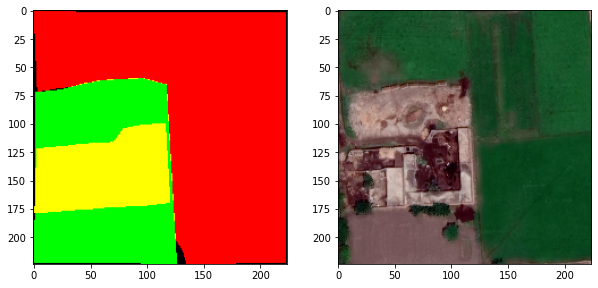

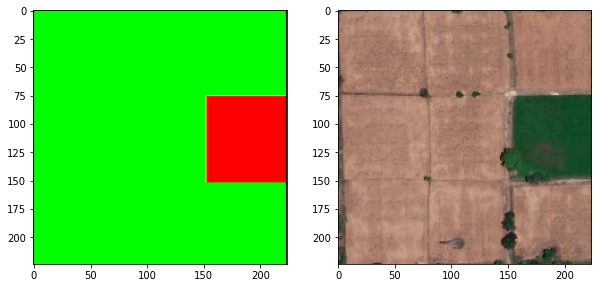

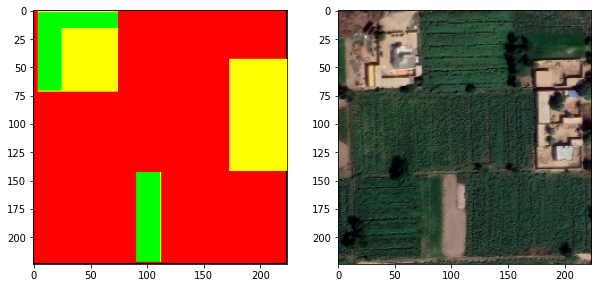

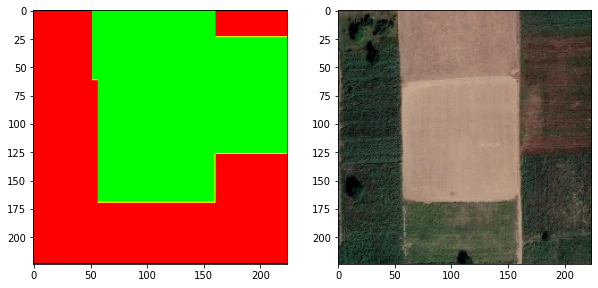

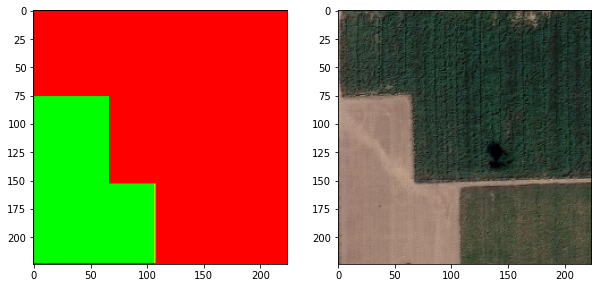

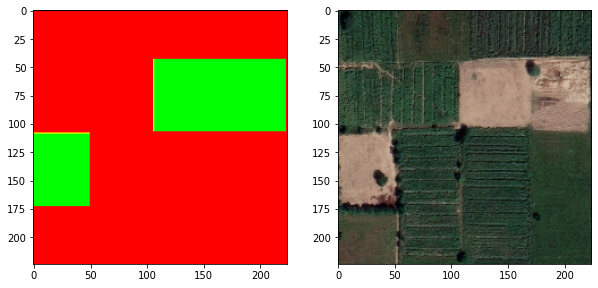

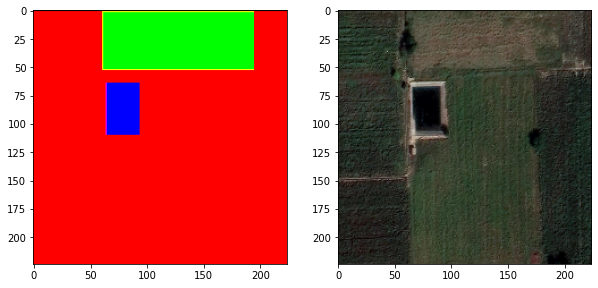

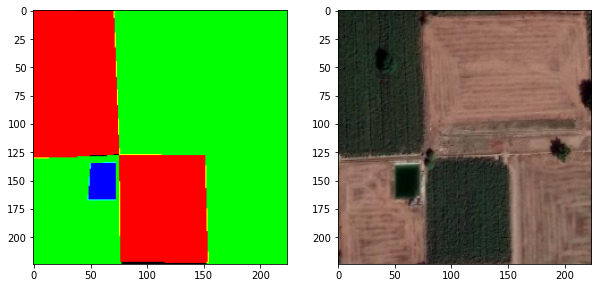

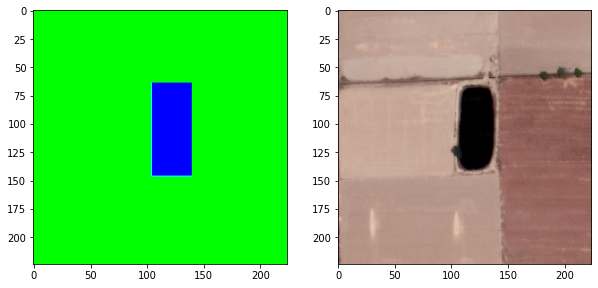

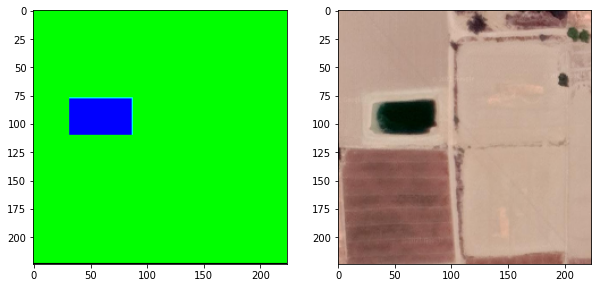

In [9]:

for i in range(90, 100):
    fig, axs = plt.subplots(1, 2, figsize=(10, 10))
    axs[0].imshow(y_masks_arr[i])
    axs[1].imshow(x_images_arr[i])

    plt.show()

In [10]:
# images_x = []
# masks_y = []
# dims = (256, 256)
# for img, mas in zip(image_name_list, masks_name_list):
#     image_path = os.path.join(images_folder, img)
#     mask_path = os.path.join(masks_folder, mas)
#     image = cv2.imread(image_path)
#     image = cv2.resize(image, dims, interpolation=cv2.INTER_LINEAR)
#     images_x.append(image)
#     mask = cv2.imread(mask_path)
#     mask = cv2.resize(image, dims, interpolation=cv2.INTER_LINEAR)
#     masks_y.append(mask)
    
# x = np.asarray(images_x)
# y = np.asarray(masks_y)

# from keras.applications.vgg16 import preprocess_input

# X_train, X_test, y_train, y_test = train_test_split(x_images_arr, y_masks_arr, test_size=0.2)

# X_train = preprocess_input(X_train)
# X_test = preprocess_input(X_test)

In [21]:
K.clear_session()
def ModelEnhancer():
    input_shape = (224, 224, 3)
    VGG16_weight = "../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
    VGG16 = vgg16.VGG16(include_top=False, weights=VGG16_weight, input_shape=input_shape)
    last_layer = VGG16.output
    
    set_trainable = False
    for layer in VGG16.layers:
        if layer.name in ['block1_conv1']:
            set_trainable = True
        if layer.name in ['block1_pool','block2_pool','block3_pool','block4_pool','block5_pool']:
            layer.trainable = False
            
    model_ = Conv2DTranspose(256,(2,2),strides=(2, 2))(last_layer)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)    
    
    concat_1 = concatenate([model_,VGG16.get_layer("block5_conv3").output])
    
    model_ = Conv2D(512,(3,3),strides=(1, 1),padding='same')(concat_1)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2DTranspose(512,(3,3),strides=(2, 2),padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_) 
    
    concat_2 = concatenate([model_,VGG16.get_layer("block4_conv3").output])
    
    model_ = Conv2D(512,(3,3),strides=(1, 1),padding='same')(concat_2)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2DTranspose(512,(2,2),strides=(2, 2))(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_) 
    
    concat_3 = concatenate([model_,VGG16.get_layer("block3_conv3").output])
    
    model_ = Conv2D(256,(3,3),strides=(1, 1),padding='same')(concat_3)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2DTranspose(256,(3,3),strides=(2, 2),padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_) 
    
    concat_4 = concatenate([model_,VGG16.get_layer("block2_conv2").output])
    
    model_ = Conv2D(128,(3,3),strides=(1, 1),padding='same')(concat_4)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2DTranspose(128,(3,3),strides=(2, 2),padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_) 
    
    concat_5 = concatenate([model_,VGG16.get_layer("block1_conv2").output])
    
    model_ = Conv2D(64,(3,3),strides=(1, 1),padding='same')(concat_5)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(32,(3,3),strides=(1, 1),padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(3,(3,3),strides=(1, 1),padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)
    
#     model_ = Conv2D(1,(3,3),strides=(1, 1),padding='same')(model_)
#     model_ = LeakyReLU(0.1)(model_)
#     model_ = BatchNormalization()(model_)
    
    model_ = Model(VGG16.input,model_)
    
    return model_

In [22]:
Model_ = ModelEnhancer()
# Model_.summary()

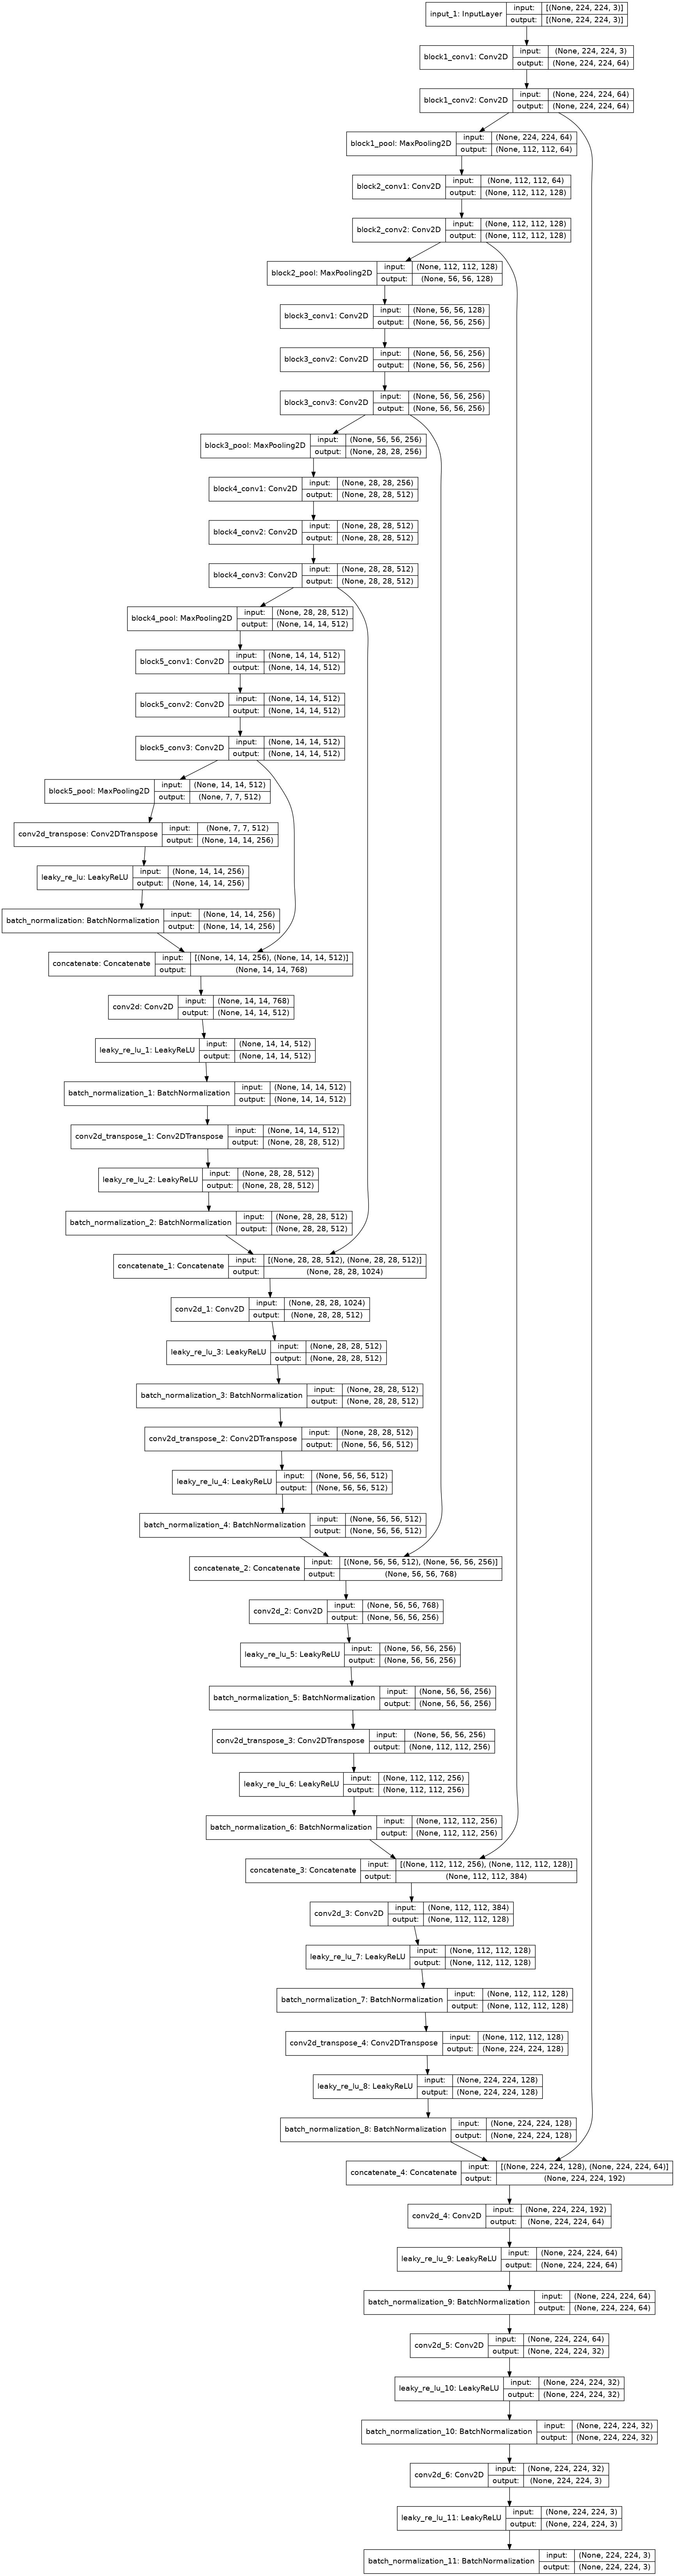

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(Model_,to_file='model_.png',show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_.png')

In [24]:
from keras.optimizers import Adam

Model_.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
checkpointer = ModelCheckpoint('model_TL_UNET.h5', verbose=1,mode='auto', monitor='loss',save_best_only=True)

In [26]:
# Model_.save('model_TL_UNET.h5')

In [28]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,224,224,3)
        y_input = y[i].reshape(1,224,224,3)
        yield (X_input,y_input)
Model_.fit(GenerateInputs(x_images_arr,y_masks_arr) , epochs=100,verbose=1,callbacks=[checkpointer],
                     steps_per_epoch=32,shuffle=True)

Epoch 1/100
32/32 [==============================] - 5s 156ms/step - loss: 103.5253 - accuracy: 0.5499

Epoch 00001: loss improved from 290.50992 to 103.52530, saving model to model_TL_UNET.h5
Epoch 2/100
32/32 [==============================] - 5s 157ms/step - loss: 182.1089 - accuracy: 0.5140

Epoch 00002: loss did not improve from 103.52530
Epoch 3/100
32/32 [==============================] - 5s 157ms/step - loss: 138.8343 - accuracy: 0.4970

Epoch 00003: loss did not improve from 103.52530
Epoch 4/100
32/32 [==============================] - 5s 157ms/step - loss: 97.5263 - accuracy: 0.5599

Epoch 00004: loss improved from 103.52530 to 97.52634, saving model to model_TL_UNET.h5
Epoch 5/100
32/32 [==============================] - 5s 156ms/step - loss: -71.3776 - accuracy: 0.6070

Epoch 00005: loss improved from 97.52634 to -71.37756, saving model to model_TL_UNET.h5
Epoch 6/100
32/32 [==============================] - 5s 157ms/step - loss: 11.0005 - accuracy: 0.5340

Epoch 00006: lo

In [29]:
FinalModel = load_model('model_TL_UNET.h5')

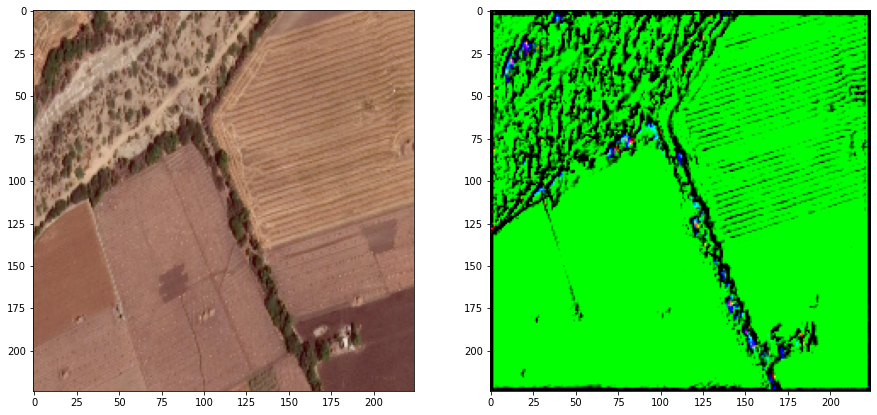

In [40]:
test_images = os.path.join(images_folder2, image_name_list2[52]) 
test_images = cv2.imread(test_images)
img = cv2.cvtColor(test_images, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))

# for i in img:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(img)
# axs[0].imshow(x_images_arr[i])

img = img.reshape(1,224,224,3)
prediction = FinalModel.predict(img)
pred = prediction.reshape(224,224,3)
pred = cv2.resize(pred,(224,224))
    
axs[1].imshow(pred)

plt.show()

In [ ]:
os.listdir('./')

In [ ]:
import h5py

In [ ]:
hf = h5py.File('model_TL_UNET.h5', 'r')
hf

In [ ]:
print(*hf)